In [102]:
# Import Modules

import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [103]:
import yfinance as yf

ticker = "AAPL"
start_date = "2011-02-17"
end_date = "2019-11-10"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [104]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-02-17,12.758929,12.866786,12.732857,12.796429,10.891273,530583200
2011-02-18,12.811071,12.839286,12.482857,12.520000,10.656000,816057200
2011-02-22,12.219643,12.335714,12.061429,12.093214,10.292753,872555600
2011-02-23,12.098929,12.308571,12.093214,12.236429,10.414649,671854400
2011-02-24,12.286429,12.326786,12.084643,12.245714,10.422554,499900800
...,...,...,...,...,...,...
2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000
2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600
2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400


In [105]:
data
df=data
df=df.reset_index()
index=2451
data=df

In [106]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-02-17,12.758929,12.866786,12.732857,12.796429,10.891273,530583200
1,2011-02-18,12.811071,12.839286,12.482857,12.520000,10.656000,816057200
2,2011-02-22,12.219643,12.335714,12.061429,12.093214,10.292753,872555600
3,2011-02-23,12.098929,12.308571,12.093214,12.236429,10.414649,671854400
4,2011-02-24,12.286429,12.326786,12.084643,12.245714,10.422554,499900800
...,...,...,...,...,...,...,...
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400


In [107]:
# Create 4 copies of data to add columns of different sets of Technical Indicators

techindi1 = copy.deepcopy(data)
techindi2 = copy.deepcopy(data)
techindi3 = copy.deepcopy(data)
techindi4 = copy.deepcopy(data)

In [108]:
# Relative Strength Index
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [109]:
# # Add Momentum_1D column for all 15 stocks.
# # Momentum_1D = P(t) - P(t-1)

# techindi1['Momentum_1D'] = (techindi1['Close']-techindi1['Close'].shift(1)).fillna(0)
# techindi1['RSI_14D'] = techindi1['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
# techindi1.tail(5)

In [110]:
import pandas as pd

# load stock data
# stock_data = pd.read_csv('stock_data.csv')

# calculate Momentum_1D
techindi1['Momentum_1D'] = techindi1['Close'] - techindi1['Close'].shift(1)

# calculate RSI_14D
delta = techindi1['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
techindi1['RSI_14D'] = 100 - (100 / (1 + rs))


In [111]:
techindi1

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D
0,2011-02-17,12.758929,12.866786,12.732857,12.796429,10.891273,530583200,NaN,NaN
1,2011-02-18,12.811071,12.839286,12.482857,12.520000,10.656000,816057200,-0.276428,NaN
2,2011-02-22,12.219643,12.335714,12.061429,12.093214,10.292753,872555600,-0.426786,NaN
3,2011-02-23,12.098929,12.308571,12.093214,12.236429,10.414649,671854400,0.143215,NaN
4,2011-02-24,12.286429,12.326786,12.084643,12.245714,10.422554,499900800,0.009285,NaN
...,...,...,...,...,...,...,...,...,...
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000,0.419998,80.168644
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600,-0.092499,81.453862
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400,0.027496,81.034493
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400,0.547501,81.586178


In [112]:
techindi1.fillna(0, inplace=True)
techindi1

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D
0,2011-02-17,12.758929,12.866786,12.732857,12.796429,10.891273,530583200,0.000000,0.000000
1,2011-02-18,12.811071,12.839286,12.482857,12.520000,10.656000,816057200,-0.276428,0.000000
2,2011-02-22,12.219643,12.335714,12.061429,12.093214,10.292753,872555600,-0.426786,0.000000
3,2011-02-23,12.098929,12.308571,12.093214,12.236429,10.414649,671854400,0.143215,0.000000
4,2011-02-24,12.286429,12.326786,12.084643,12.245714,10.422554,499900800,0.009285,0.000000
...,...,...,...,...,...,...,...,...,...
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000,0.419998,80.168644
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600,-0.092499,81.453862
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400,0.027496,81.034493
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400,0.547501,81.586178


In [113]:
techindi1['Volume_plain'] = techindi1['Volume'].fillna(0)
techindi1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000,0.419998,80.168644,103272000
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600,-0.092499,81.453862,79897600
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400,0.027496,81.034493,75864400
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400,0.547501,81.586178,94940400
2196,2019-11-08,64.672501,65.110001,64.212502,65.035004,63.616207,69986400,0.177505,79.697456,69986400


In [114]:
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [115]:
techindi1['BB_Middle_Band'], techindi1['BB_Upper_Band'], techindi1['BB_Lower_Band'] = bbands(techindi1['Close'], length=20, numsd=1)
techindi1['BB_Middle_Band'] = techindi1['BB_Middle_Band'].fillna(0)
techindi1['BB_Upper_Band'] = techindi1['BB_Upper_Band'].fillna(0)
techindi1['BB_Lower_Band'] = techindi1['BB_Lower_Band'].fillna(0)
techindi1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000,0.419998,80.168644,103272000,60.081,62.250,57.911
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600,-0.092499,81.453862,79897600,60.490,62.641,58.339
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400,0.027496,81.034493,75864400,60.868,62.991,58.744
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400,0.547501,81.586178,94940400,61.234,63.383,59.085
2196,2019-11-08,64.672501,65.110001,64.212502,65.035004,63.616207,69986400,0.177505,79.697456,69986400,61.533,63.777,59.290


In [116]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [117]:
listofzeros = [0] * 25
up, down = aroon(techindi1)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * techindi1.shape[0]
    techindi1['Aroon_Oscillator'] = aroon_list
else:
    techindi1['Aroon_Oscillator'] = listofzeros+aroon_list

In [118]:
techindi1["PVT"] = (techindi1['Momentum_1D']/ techindi1['Close'].shift(1))*techindi1['Volume']
techindi1["PVT"] = techindi1["PVT"]-techindi1["PVT"].shift(1)
techindi1["PVT"] = techindi1["PVT"].fillna(0)
techindi1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000,0.419998,80.168644,103272000,60.081,62.250,57.911,84.0,-3.610861e+06
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600,-0.092499,81.453862,79897600,60.490,62.641,58.339,88.0,-7.929992e+05
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400,0.027496,81.034493,75864400,60.868,62.991,58.744,92.0,1.472532e+05
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400,0.547501,81.586178,94940400,61.234,63.383,59.085,92.0,7.758209e+05
2196,2019-11-08,64.672501,65.110001,64.212502,65.035004,63.616207,69986400,0.177505,79.697456,69986400,61.533,63.777,59.290,96.0,-6.167288e+05


In [119]:
def abands(df):
    #df['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [120]:
abands(techindi1)
techindi1 = techindi1.fillna(0)
techindi1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,aupband,AB_Upper_Band,adownband,AB_Lower_Band
2192,2019-11-04,64.332497,64.462502,63.845001,64.375000,62.782104,103272000,0.419998,80.168644,103272000,60.081,62.250,57.911,84.0,-3.610861e+06,60.080875,65.703446,62.410033,62.615944,57.497534
2193,2019-11-05,64.262497,64.547501,64.080002,64.282501,62.691898,79897600,-0.092499,81.453862,79897600,60.490,62.641,58.339,88.0,-7.929992e+05,60.490000,65.485896,62.739559,63.148403,57.943310
2194,2019-11-06,64.192497,64.372498,63.842499,64.309998,62.718704,75864400,0.027496,81.034493,75864400,60.868,62.991,58.744,92.0,1.472532e+05,60.867625,65.436877,63.110023,62.786883,58.315650
2195,2019-11-07,64.684998,65.087502,64.527496,64.857498,63.442566,94940400,0.547501,81.586178,94940400,61.234,63.383,59.085,92.0,7.758209e+05,61.234375,66.212351,63.461102,63.412325,58.722977
2196,2019-11-08,64.672501,65.110001,64.212502,65.035004,63.616207,69986400,0.177505,79.697456,69986400,61.533,63.777,59.290,96.0,-6.167288e+05,61.533500,66.917456,63.701714,62.429961,59.072339


In [121]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
techindi1 = techindi1.drop(labels = columns2Drop, axis=1)
techindi1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
0,2011-02-17,12.758929,12.866786,12.732857,12.796429,10.891273,530583200,0.0,530583200,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,2011-02-18,12.811071,12.839286,12.482857,12.520000,10.656000,816057200,0.0,816057200,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,2011-02-22,12.219643,12.335714,12.061429,12.093214,10.292753,872555600,0.0,872555600,0.0,0.0,0.0,0.0,-1.211555e+07,0.0,0.0,0.0
3,2011-02-23,12.098929,12.308571,12.093214,12.236429,10.414649,671854400,0.0,671854400,0.0,0.0,0.0,0.0,3.770051e+07,0.0,0.0,0.0
4,2011-02-24,12.286429,12.326786,12.084643,12.245714,10.422554,499900800,0.0,499900800,0.0,0.0,0.0,0.0,-7.577184e+06,0.0,0.0,0.0


In [122]:
techindi1.index = techindi1['Date']
techindi1 = techindi1.drop(labels = ['Date'], axis = 1)

In [123]:
def normalized_df(df):
    normalized_df=(df-df.mean())/df.std()
    return normalized_df

In [124]:
normalized_df1 = copy.deepcopy(techindi1)

In [125]:
normalized_df1.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band
Date,,,,,,,,,,,,,,,,
2011-02-17,12.758929,12.866786,12.732857,12.796429,10.891273,530583200,0.0,530583200,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2011-02-18,12.811071,12.839286,12.482857,12.520000,10.656000,816057200,0.0,816057200,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2011-02-22,12.219643,12.335714,12.061429,12.093214,10.292753,872555600,0.0,872555600,0.0,0.0,0.0,0.0,-1.211555e+07,0.0,0.0,0.0
2011-02-23,12.098929,12.308571,12.093214,12.236429,10.414649,671854400,0.0,671854400,0.0,0.0,0.0,0.0,3.770051e+07,0.0,0.0,0.0
2011-02-24,12.286429,12.326786,12.084643,12.245714,10.422554,499900800,0.0,499900800,0.0,0.0,0.0,0.0,-7.577184e+06,0.0,0.0,0.0


In [126]:
# normalized_df1 = normalized_df1.set_index('Date')

In [127]:
mean = normalized_df1.mean(axis = 0)
# mean = normalized_df1.mean(axis=0, numeric_only=True)

normalized_df1 -= mean
std = normalized_df1.std(axis=0)
normalized_df1 /= std

In [128]:
## Add the label class based on whether stock goes up or down
def add_label(df):
    idx = len(df.columns)
    new_col = np.where(df['Close'] >= df['Close'].shift(1), 1, 0)  
    df.insert(loc=idx, column='Label', value=new_col)
    df = df.fillna(0)

In [129]:
add_label(normalized_df1) 

In [130]:
normalized_df1.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,Label
Date,,,,,,,,,,,,,,,,,
2011-02-17,-1.327490,-1.327852,-1.318432,-1.323212,-1.278629,1.301599,-2.969983,1.301599,-2.322476,-2.324367,-2.317887,-0.246283,-0.000641,-2.322475,-2.326378,-2.316435,0
2011-02-18,-1.323295,-1.330045,-1.338698,-1.345421,-1.297274,2.703025,-2.969983,2.703025,-2.322476,-2.324367,-2.317887,-0.246283,-0.000641,-2.322475,-2.326378,-2.316435,0
2011-02-22,-1.370868,-1.370191,-1.372862,-1.379709,-1.326060,2.980383,-2.969983,2.980383,-2.322476,-2.324367,-2.317887,-0.246283,-0.957795,-2.322475,-2.326378,-2.316435,0
2011-02-23,-1.380578,-1.372355,-1.370285,-1.368203,-1.316401,1.995116,-2.969983,1.995116,-2.322476,-2.324367,-2.317887,-0.246283,2.977780,-2.322475,-2.326378,-2.316435,1
2011-02-24,-1.365496,-1.370902,-1.370980,-1.367457,-1.315774,1.150976,-2.969983,1.150976,-2.322476,-2.324367,-2.317887,-0.246283,-0.599254,-2.322475,-2.326378,-2.316435,1


In [131]:
normalized_df1 = normalized_df1.fillna(0) 

In [132]:
normalized_df1.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Aroon_Oscillator,PVT,AB_Middle_Band,AB_Upper_Band,AB_Lower_Band,Label
Date,,,,,,,,,,,,,,,,,
2011-02-17,-1.327490,-1.327852,-1.318432,-1.323212,-1.278629,1.301599,-2.969983,1.301599,-2.322476,-2.324367,-2.317887,-0.246283,-0.000641,-2.322475,-2.326378,-2.316435,0
2011-02-18,-1.323295,-1.330045,-1.338698,-1.345421,-1.297274,2.703025,-2.969983,2.703025,-2.322476,-2.324367,-2.317887,-0.246283,-0.000641,-2.322475,-2.326378,-2.316435,0
2011-02-22,-1.370868,-1.370191,-1.372862,-1.379709,-1.326060,2.980383,-2.969983,2.980383,-2.322476,-2.324367,-2.317887,-0.246283,-0.957795,-2.322475,-2.326378,-2.316435,0
2011-02-23,-1.380578,-1.372355,-1.370285,-1.368203,-1.316401,1.995116,-2.969983,1.995116,-2.322476,-2.324367,-2.317887,-0.246283,2.977780,-2.322475,-2.326378,-2.316435,1
2011-02-24,-1.365496,-1.370902,-1.370980,-1.367457,-1.315774,1.150976,-2.969983,1.150976,-2.322476,-2.324367,-2.317887,-0.246283,-0.599254,-2.322475,-2.326378,-2.316435,1


In [133]:
normalized_df1 = normalized_df1.values
# normalized_df2 = normalized_df2.values
# normalized_df3 = normalized_df3.values
# normalized_df4 = normalized_df4.values
type(normalized_df1)

numpy.ndarray

In [134]:
from keras.utils import to_categorical
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=32, step=5):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, to_categorical(targets)

In [135]:
# 10 10, 10, 64
# 5, 5, ,5 ,1
lookback = 5
step = 5
delay = 5
batch_size = 32

In [136]:
train_gen = generator(normalized_df1,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=round(0.6*len(normalized_df1)),
                      shuffle=False,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(normalized_df1,
                    lookback=lookback,
                    delay=delay,
                    min_index=round(0.6*len(normalized_df1))+1,
                    max_index=round(0.8*len(normalized_df1)),
                    step=step,
                    batch_size=batch_size)
test_gen = generator(normalized_df1,
                     lookback=lookback,
                     delay=delay,
                     min_index=round(0.8*len(normalized_df1))+1,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (round(0.8*len(normalized_df1)) - round(0.6*len(normalized_df1))+1 - lookback) # how many steps to draw from val_gen in order to see the entire validation set
test_steps = (len(normalized_df1) - round(0.8*len(normalized_df1))+1 - lookback)
# How many steps to draw from test_gen in order to see the entire test set

In [137]:
a,b = next(train_gen)
# print labels
print(b)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [138]:
from keras.models import Sequential 
from keras import layers
from keras.optimizers import RMSprop

In [139]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, normalized_df1.shape[-1]))) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 17)                0         
                                                                 
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model.fit_generator(train_gen,
                              steps_per_epoch=2, 
                              epochs=50, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)

Epoch 1/50


<ipython-input-140-5e3886693f29>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


2/2 [==============================] - 2s 1s/step - loss: 0.7242 - accuracy: 0.5312 - val_loss: 0.7956 - val_accuracy: 0.5434
Epoch 2/50
2/2 [==============================] - 1s 1s/step - loss: 1.0065 - accuracy: 0.5000 - val_loss: 0.7943 - val_accuracy: 0.5429
Epoch 3/50
2/2 [==============================] - 2s 2s/step - loss: 0.7461 - accuracy: 0.4219 - val_loss: 0.7913 - val_accuracy: 0.5436
Epoch 4/50
2/2 [==============================] - 3s 3s/step - loss: 0.9845 - accuracy: 0.5938 - val_loss: 0.7897 - val_accuracy: 0.5480
Epoch 5/50
2/2 [==============================] - 1s 1s/step - loss: 0.9517 - accuracy: 0.4062 - val_loss: 0.7913 - val_accuracy: 0.5501
Epoch 6/50
2/2 [==============================] - 1s 1s/step - loss: 0.8722 - accuracy: 0.5000 - val_loss: 0.7892 - val_accuracy: 0.5432
Epoch 7/50
2/2 [==============================] - 1s 1s/step - loss: 0.7230 - accuracy: 0.4062 - val_loss: 0.7933 - val_accuracy: 0.5358
Epoch 8/50
2/2 [==============================] - 1s

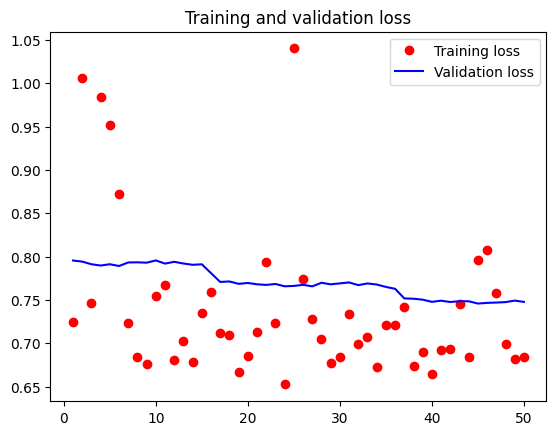

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

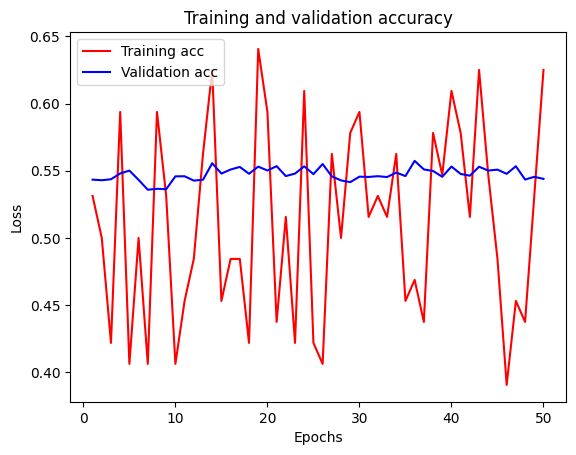

In [142]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [143]:
test_loss, test_acc = model.evaluate_generator(test_gen, steps=3)
print('test acc:', test_acc)
print("test_loss:", test_loss)

test acc: 0.5
test_loss: 1.1116515398025513


<ipython-input-143-bdbab09721f7>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_gen, steps=3)
